In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r'C:\Projects_ciência_dados\regression_car_price\data\raw\used_cars.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [4]:
dataset

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950"
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900"
4006,Porsche,Taycan,2022,"2,116 mi.",NaN,Electric,Automatic,Black,Black,None reported,NaN,"$90,998"
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999"


Valores faltantes

In [5]:
dataset.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [6]:
dataset.describe()

,model_year
count,4009.000000
mean,2015.515590
std,6.104816
min,1974.000000
25%,2012.000000
50%,2017.000000
75%,2020.000000
max,2024.000000


Distância interquartílica

In [7]:
(dataset['model_year'].quantile(0.75))-(dataset['model_year'].quantile(0.25))

np.float64(8.0)

Média aparada

In [8]:
from scipy.stats import trim_mean

In [9]:
trim_mean(dataset['model_year'], 0.1)

np.float64(2016.256466188844)

boxplot

<Axes: ylabel='model_year'>

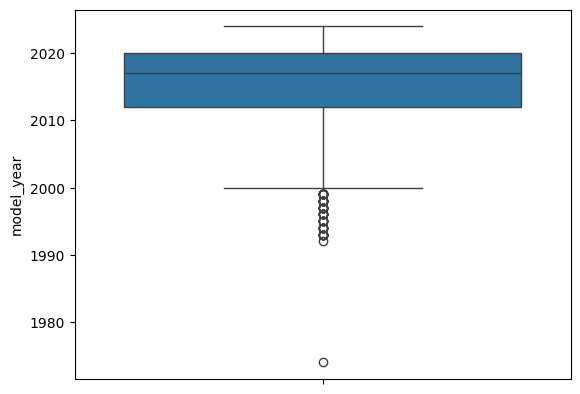

In [10]:
sns.boxplot(data=dataset, y=dataset['model_year'])

histograma

<Axes: xlabel='model_year', ylabel='Count'>

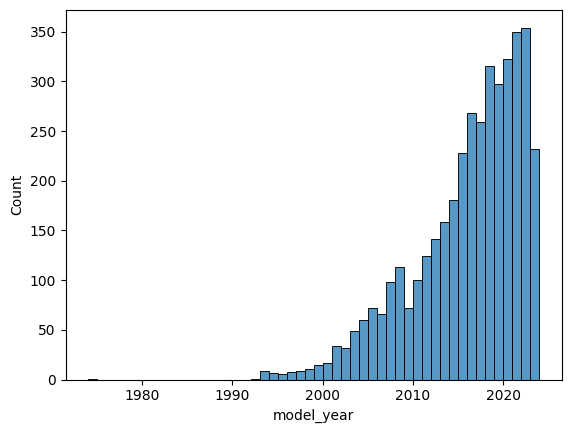

In [11]:
sns.histplot(data=dataset, x=dataset['model_year'])

Price está como Object e possui '$'

In [12]:
dataset['price'].dtype

dtype('O')

In [13]:
dataset['price']

0        $10,300
1        $38,005
2        $54,598
3        $15,500
4        $34,999
          ...   
4004    $349,950
4005     $53,900
4006     $90,998
4007     $62,999
4008     $40,000
Name: price, Length: 4009, dtype: object

Retirando '$' ',' e transformando em float

In [14]:
dataset['price'] = dataset['price'].str.replace(r'[\$,]', '', regex=True).astype(float)

In [15]:
model_year_price = dataset.select_dtypes(include=['int', 'float'])

In [16]:
model_year_price

,model_year,price
0,2013,10300.0
1,2021,38005.0
2,2022,54598.0
3,2015,15500.0
4,2021,34999.0
...,...,...
4004,2023,349950.0
4005,2022,53900.0
4006,2022,90998.0
4007,2020,62999.0


Ano de fabricação do carro possui uma correlação fraca com preço

<Axes: >

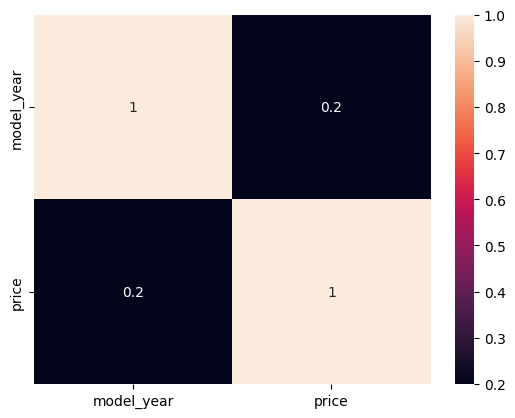

In [17]:
sns.heatmap(model_year_price.corr(), annot=True)

In [18]:
dataset.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

Bugatti Apresenta o maior preço

Text(0.5, 1.0, 'Preço médio por marca')

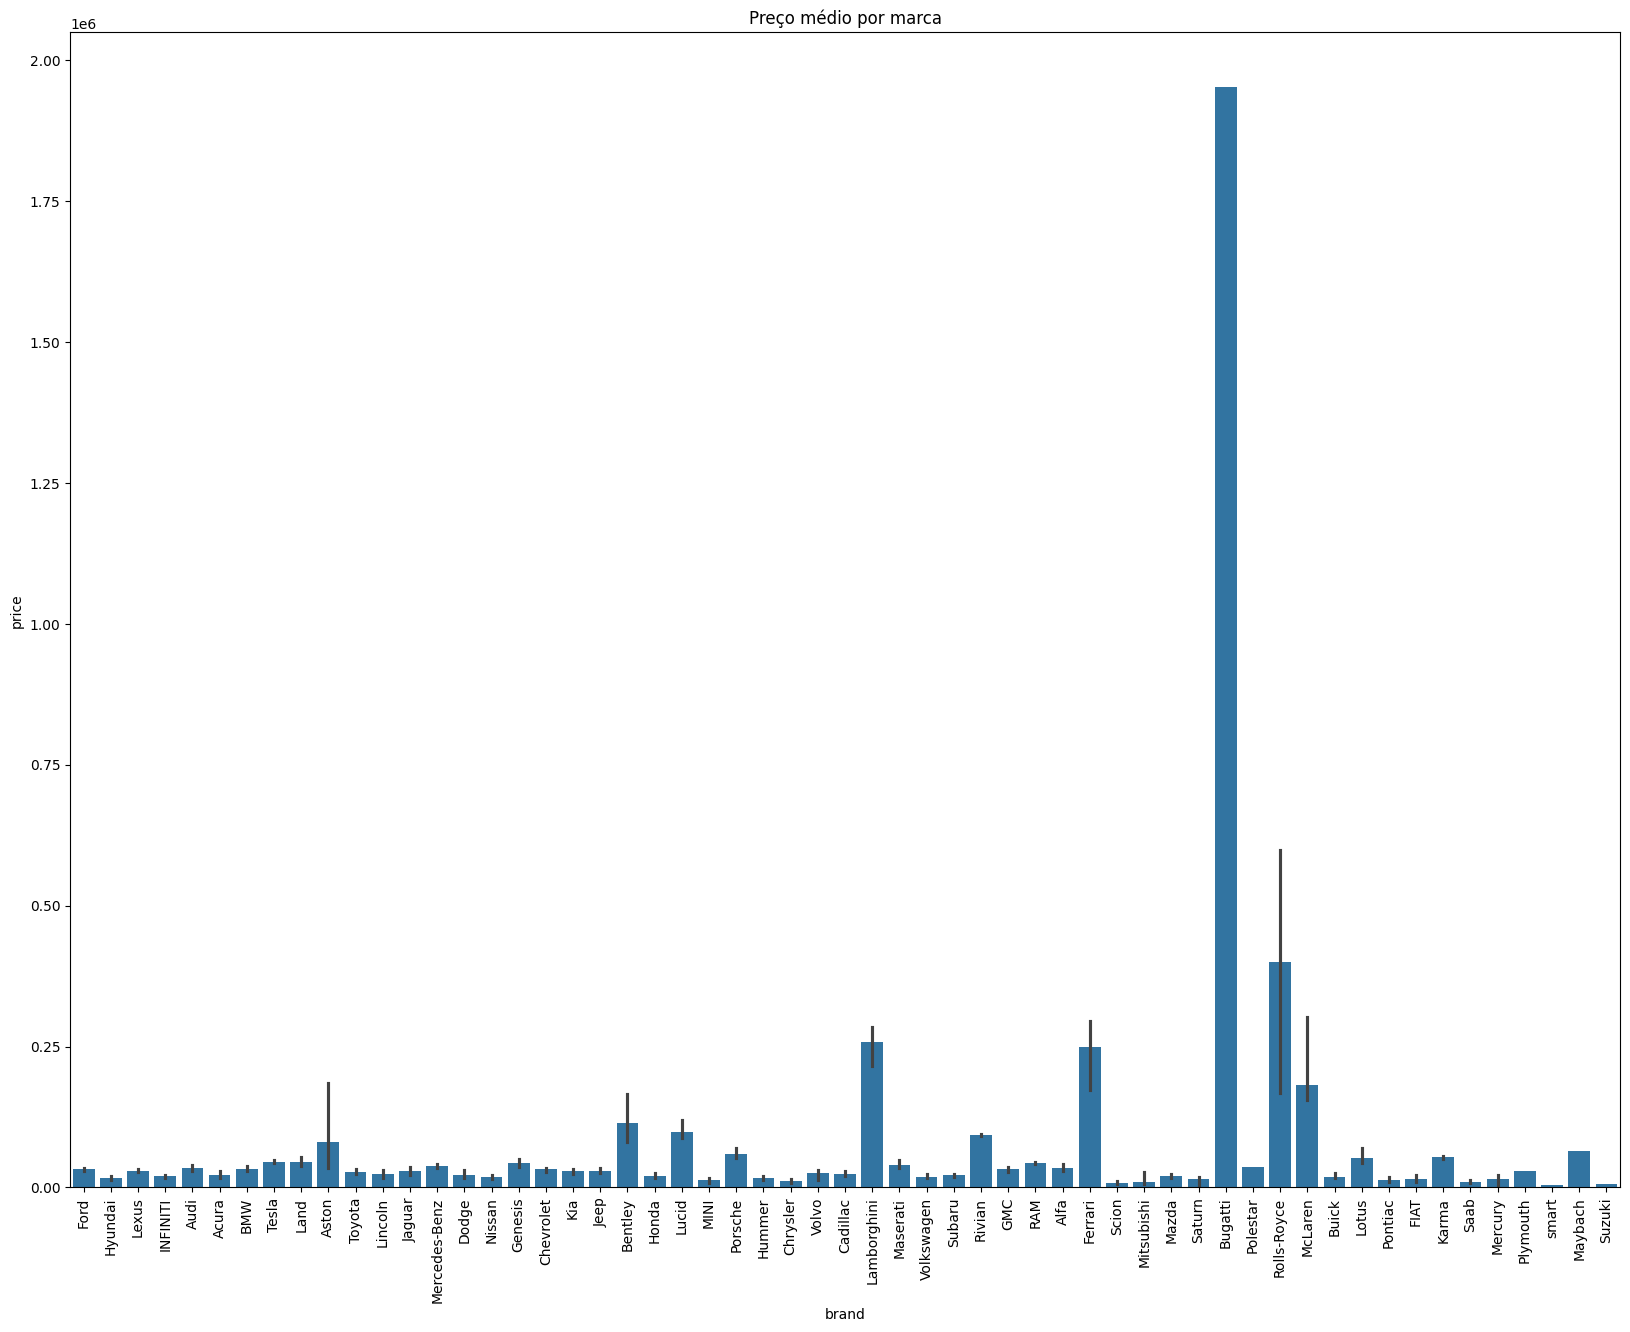

In [19]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=90)
sns.barplot(data=dataset, x=dataset['brand'], y=dataset['price'], estimator=np.median)
plt.title('Preço médio por marca')

In [20]:
dataset.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

Modelo que possui maior preço

In [21]:
def modelo_maior_preco(dataset):
    maior_preco = dataset['price'].max()
    data = dataset.loc[dataset['price'] == maior_preco]
    
    return data['model']
    

In [22]:
modelo_maior_preco(dataset)

693    Quattroporte Base
Name: model, dtype: object

In [23]:
dataset

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,349950.0
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,53900.0
4006,Porsche,Taycan,2022,"2,116 mi.",NaN,Electric,Automatic,Black,Black,None reported,NaN,90998.0
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,62999.0


Retirada do 'mi' e da ',' da coluna milage 

In [24]:
dataset['milage'] = (
    dataset['milage']
    .str.replace(',', '', regex=False)
    .str.replace('mi.', '', regex=False)
    .str.replace('mi', '', regex=False)
    .astype(float))

In [25]:
dataset['milage']

0       51000.0
1       34742.0
2       22372.0
3       88900.0
4        9835.0
         ...   
4004      714.0
4005    10900.0
4006     2116.0
4007    33000.0
4008    43000.0
Name: milage, Length: 4009, dtype: float64

In [26]:
milage_price = pd.DataFrame({
    'milage':dataset['milage'],
    'price':dataset['price']
})

Milhas rodadas possui fraca correlação com preço

<Axes: >

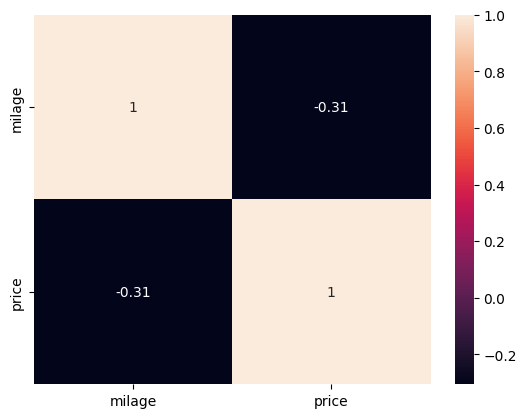

In [27]:
sns.heatmap(milage_price.corr(), annot=True)

<Axes: xlabel='price', ylabel='milage'>

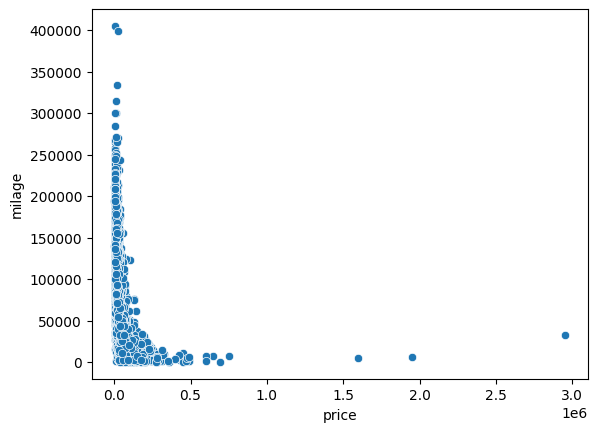

In [28]:
sns.scatterplot(data=dataset, x=dataset['price'], y=dataset['milage'])

In [29]:
dataset['fuel_type']

0       E85 Flex Fuel
1            Gasoline
2            Gasoline
3              Hybrid
4            Gasoline
            ...      
4004         Gasoline
4005         Gasoline
4006              NaN
4007         Gasoline
4008         Gasoline
Name: fuel_type, Length: 4009, dtype: object

<Axes: xlabel='fuel_type', ylabel='count'>

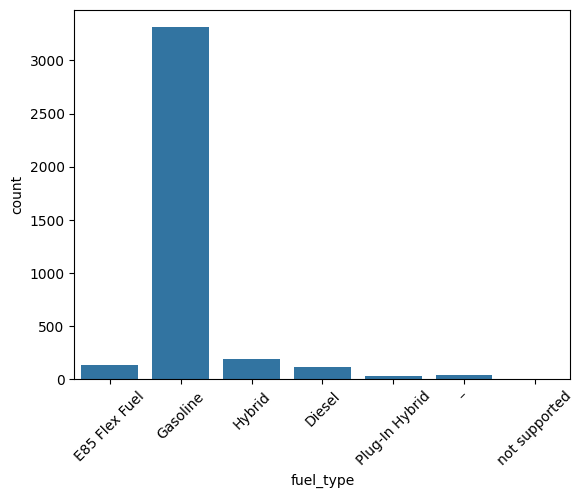

In [30]:
plt.xticks(rotation=45)
sns.countplot(data=dataset, x=dataset['fuel_type'])

Carros híbridos, diesel e Plug-In hybrid possuem quase o msm preço em média e são os mais caros

<Axes: xlabel='fuel_type', ylabel='price'>

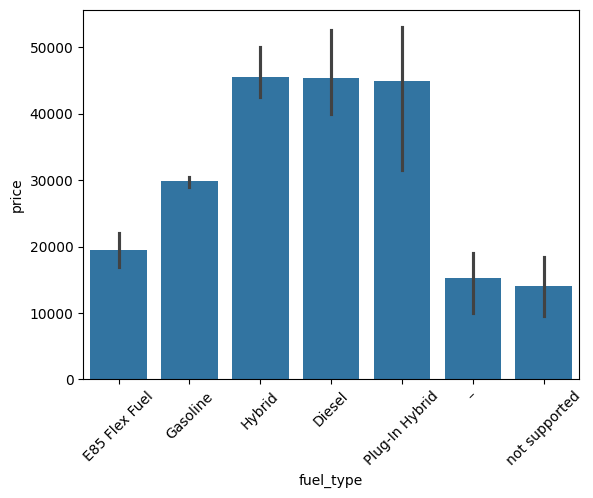

In [31]:
plt.xticks(rotation=45)
sns.barplot(data=dataset, x=dataset['fuel_type'], y=dataset['price'], estimator='median')

In [32]:
dataset.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [33]:
dataset['engine']

0       300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...
1                                    3.8L V6 24V GDI DOHC
2                                          3.5 Liter DOHC
3       354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...
4                              2.0L I4 16V GDI DOHC Turbo
                              ...                        
4004                     6.0L W12 48V PDI DOHC Twin Turbo
4005        349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel
4006                                             Electric
4007        450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel
4008         248.0HP 2.0L 4 Cylinder Engine Gasoline Fuel
Name: engine, Length: 4009, dtype: object

Apresenta 1146 valores distintos, isso pode atrapalhar o treinamento

In [34]:
np.unique(dataset['engine'], return_counts=True)

(array(['1.2L I3 12V GDI DOHC Turbo', '1.3L I3 12V GDI DOHC Turbo',
        '1.3L I3 12V MPFI DOHC Turbo', ..., 'V6', 'V8', '–'],
       shape=(1146,), dtype=object),
 array([ 2,  3,  1, ...,  2,  1, 45], shape=(1146,)))

Criando a coluna cilindradas

In [35]:
dataset['engine_size'] = (
    dataset['engine']
    .str.extract(r'(\d\.\d)L')
    .astype(float)
)

In [36]:
dataset['engine_size']

0       3.7
1       3.8
2       NaN
3       3.5
4       2.0
       ... 
4004    6.0
4005    3.0
4006    NaN
4007    3.5
4008    2.0
Name: engine_size, Length: 4009, dtype: float64

Criando a coluna cilindros

In [37]:
dataset['engine_cylinders'] = (
    dataset['engine']
    .str.extract(r'([0-9]{1,2})')
    .astype(float)
)

In [38]:
dataset['engine_cylinders']

0       30.0
1        3.0
2        3.0
3       35.0
4        2.0
        ... 
4004     6.0
4005    34.0
4006     NaN
4007    45.0
4008    24.0
Name: engine_cylinders, Length: 4009, dtype: float64

Criando a coluna turbo

In [39]:
dataset['engine_turbo'] = dataset['engine'].str.contains('Turbo', case=False)

In [40]:
dataset['engine_turbo']

0       False
1       False
2       False
3       False
4        True
        ...  
4004     True
4005    False
4006    False
4007    False
4008    False
Name: engine_turbo, Length: 4009, dtype: bool

In [41]:
dataset.to_csv('../data/interim/dataset_interim.csv')